In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("../Datasets/Space_Corrected.csv")

In [3]:
df

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [4]:
df.columns=df.columns.str.replace(" ","")

# DATA PREPARATION

 ### Identify missing values and handle it

In [5]:
df.isnull().sum()

Unnamed:0.1         0
Unnamed:0           0
CompanyName         0
Location            0
Datum               0
Detail              0
StatusRocket        0
Rocket           3360
StatusMission       0
dtype: int64

In [6]:
df['Rocket']=df['Rocket'].fillna(0)

In [7]:
df['Rocket']

0        50.0 
1       29.75 
2            0
3        65.0 
4       145.0 
         ...  
4319         0
4320         0
4321         0
4322         0
4323         0
Name: Rocket, Length: 4324, dtype: object

### Rename Columns if needed.

In [8]:
df=df.rename(columns={'Rocket':'Price'})

In [9]:
df=df.rename(columns={'Detail':'Rocket'})
df

,Unnamed:0.1,Unnamed:0,CompanyName,Location,Datum,Rocket,StatusRocket,Price,StatusMission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,0,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,0,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,0,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,0,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,0,Success


### Convert datatypes if needed

In [10]:
df.dtypes

Unnamed:0.1       int64
Unnamed:0         int64
CompanyName      object
Location         object
Datum            object
Rocket           object
StatusRocket     object
Price            object
StatusMission    object
dtype: object

In [11]:
df.Price=df.Price.replace("[,]",'',regex=True).astype('float64')

### Extract month and year column

In [12]:
df['Year']=df['Datum'].str[12:16]
df['Month']=df['Datum'].str[4:8]

#  2.Exploratory Data Analysis (EDA):

### What is the distribution of numerical features such as mission cost and launch year?

In [13]:
df.Price.describe()

count    4324.000000
mean       34.286698
std       150.442829
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      5000.000000
Name: Price, dtype: float64

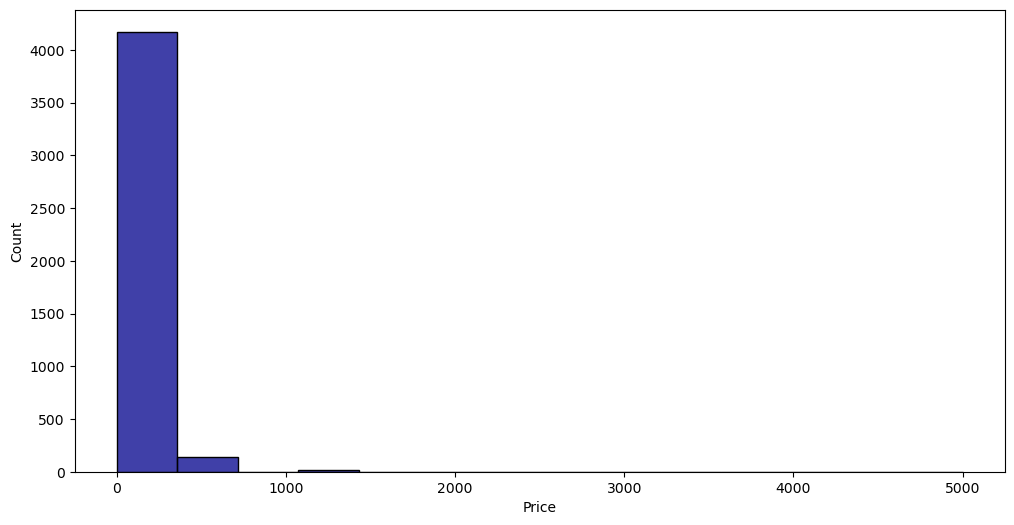

In [14]:
plt.figure(figsize=(12,6))
sb.histplot(df.Price,color='Darkblue')
plt.show()

### The hisplot shows that the most misssions fall within a lower cost range ,only a small numbers of misssion have very high costs,creating a long tail and showing  right-skewed distribution.It suggest that high cost missions are rare compared to low-budget ones.

In [15]:
 df.Year.describe()

count     4324
unique      64
top       1971
freq       119
Name: Year, dtype: object

In [16]:
df.Year.astype("int64")

0       2020
1       2020
2       2020
3       2020
4       2020
        ... 
4319    1958
4320    1958
4321    1957
4322    1957
4323    1957
Name: Year, Length: 4324, dtype: int64

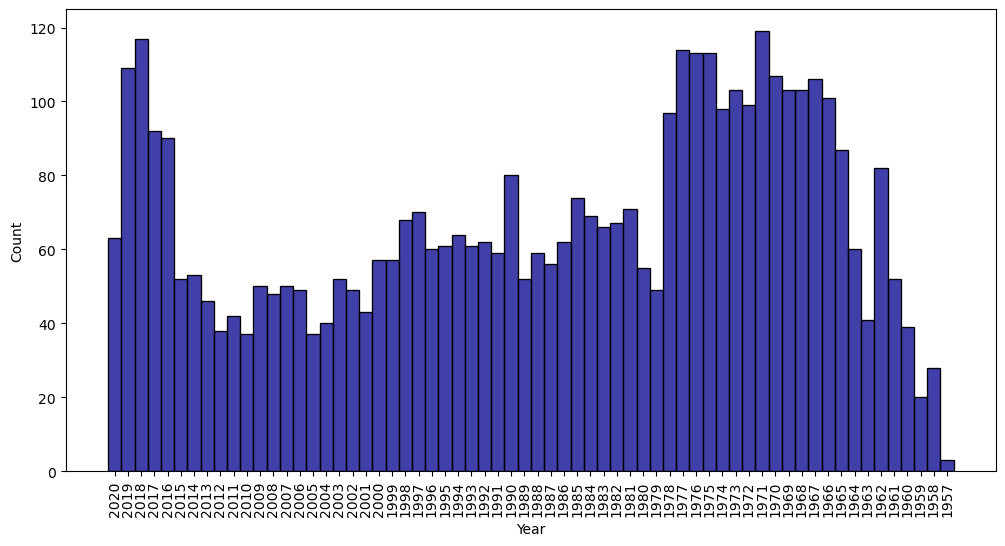

In [17]:
plt.figure(figsize=(12,6))
sb.histplot(df.Year,color='Darkblue')
plt.xticks(rotation=90)
plt.show()

####  The number of space missions grew significantly after 2010,showing a modern surge in global space activity.Earlier decades like the 1960s and 1970s also show high activity,reflecting the intense space race era between global powers.The mid-1990s to 2000s had comparatively fewer launches,suggest a period of slower growth before the recent boom.

###  What is the frequency distribution of categorical features like company name, rocket, and mission status?

In [18]:
df.CompanyName.value_counts()

CompanyName
RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
Rocket Lab            13
ISA                   13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
JAXA                   7
Land Launch            7
MITT                   7
UT                     5
CASIC                  5
KCST                   5
Exos                   4
CECLES                 4
Arm??e de l'A

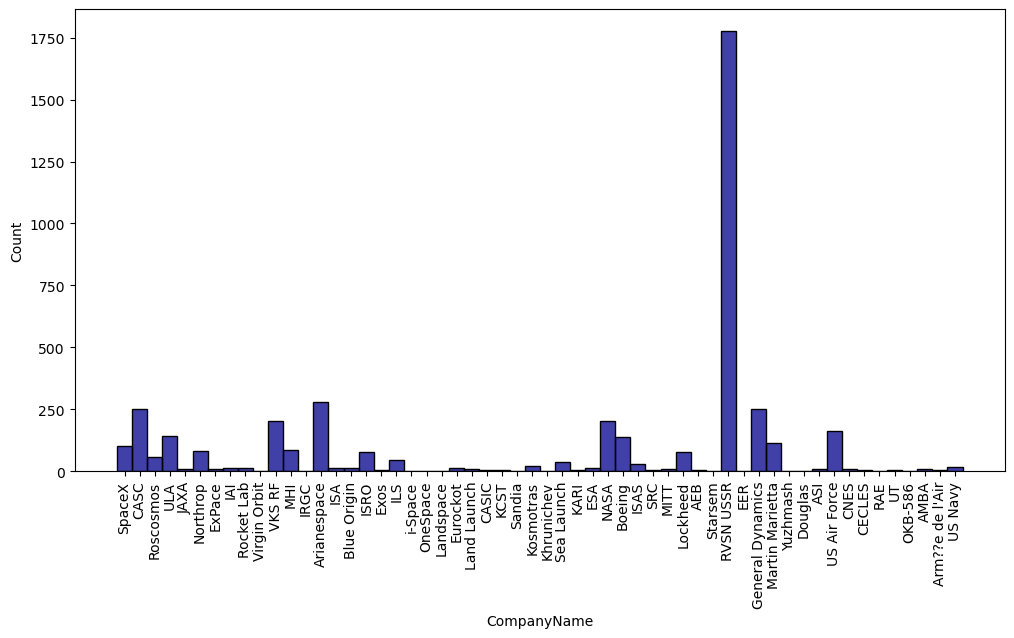

In [19]:
plt.figure(figsize=(12,6))
sb.histplot(df.CompanyName,color='Darkblue')
plt.xticks(rotation=90)
plt.show()

#### RVSN USSR dominates with an extremely high number of launches,reflecting the heavy Soviet-ers investment in space mission.Modern companies like SpaceX,CASC,Arianespace also shows strong activity.

In [20]:
df.Rocket.value_counts()

Rocket
Cosmos-3MRB (65MRB) | BOR-5 Shuttle             6
Titan IV(402)B | DSP                            5
Titan IIID | KH-11                              5
Lambda-IV S | Osumi                             5
Titan IIID | KH-9                               4
                                               ..
Vanguard | Vanguard TV3BU                       1
Juno I | Explorer 1                             1
Vanguard | Vanguard TV3                         1
Sputnik 8K71PS | Sputnik-2                      1
Proton-M/Briz-M | Ekspress-80 & Ekspress-103    1
Name: count, Length: 4278, dtype: int64

In [21]:
s=df.StatusMission.value_counts()

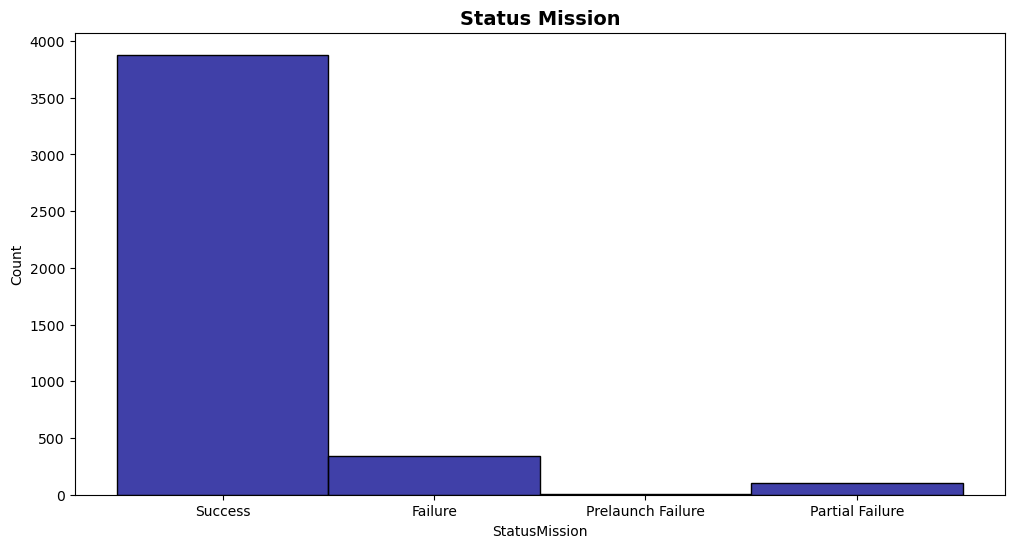

In [22]:
plt.figure(figsize=(12,6))
plt.title('Status Mission', fontsize=14, fontweight='bold')
sb.histplot(df.StatusMission,color='Darkblue')
plt.show()

#### The vast majority of missions are successful,showing strong reliability and advancement .Failures and partial failures make up only a small portion,indicating that issues are relatively rare compared to the total number of launches.

##  What is the distribution of mission costs, and are there any notable outliers?

In [23]:
df.Price.describe()

count    4324.000000
mean       34.286698
std       150.442829
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      5000.000000
Name: Price, dtype: float64

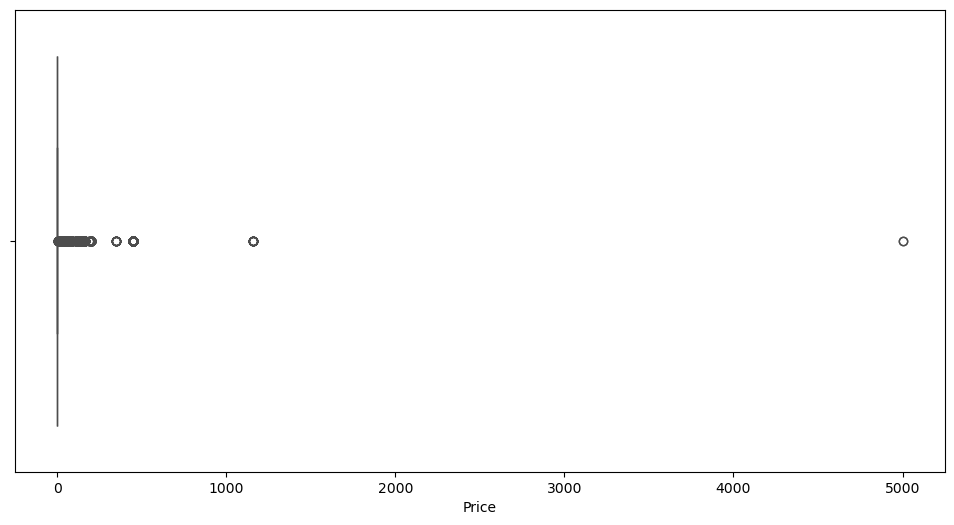

In [24]:
plt.figure(figsize=(12,6))
sb.boxplot(x=df.Price,color='RED')
plt.show()

#### The price distribution has many extreme outliers ,with a few mission costing far more than the rest.Most mission prices stay in the tight lower range,showing a gew mission costing far more than the rest.

#  3.Top Launching Agencies:

###  Which organizations have conducted the most launches?

In [25]:
r=df.CompanyName.value_counts().nlargest(10)

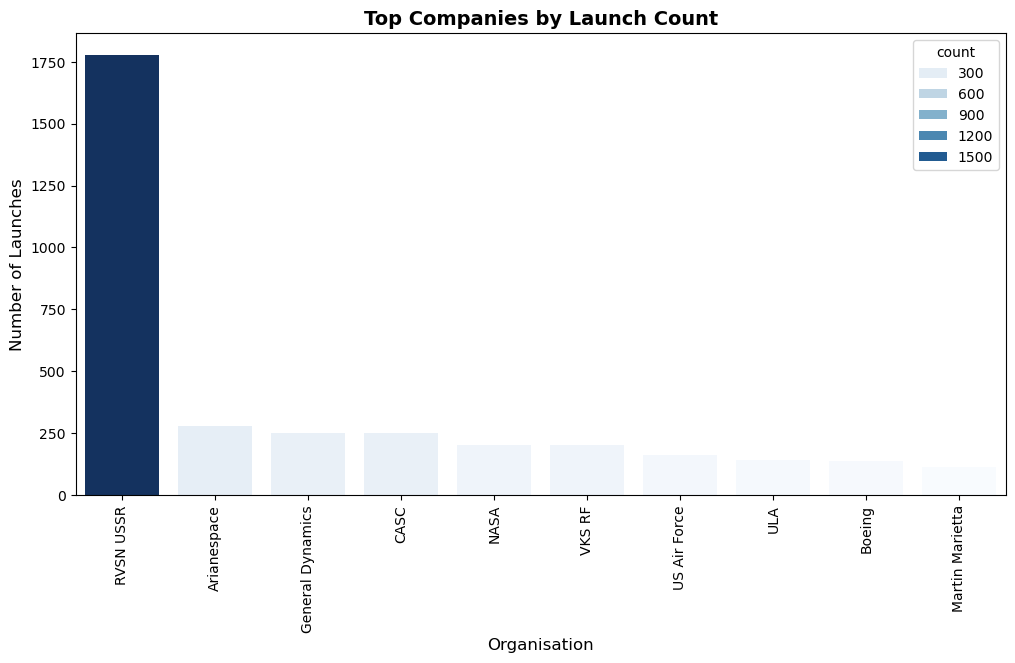

In [26]:
plt.figure(figsize=(12,6))
sb.barplot(x=r.index, y=r.values, hue=r,palette='Blues')  
plt.xlabel('Organisation', fontsize=12)
plt.ylabel('Number of Launches', fontsize=12)
plt.title('Top Companies by Launch Count', fontsize=14, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

#### RVSN USSR overwhelmingly leads with the highest number of launches,showing its historic dominance in space activity.Companies like Arianspace,General Dynamic,CASC,and NASA follow far behind,highlight a big gap between the top and rest.

### How many successful space missions has each company conducted?

In [27]:
df[df.StatusMission == 'Success'].groupby('CompanyName').size().reset_index(name='Count').sort_values(by='Count',ascending=False)

,CompanyName,Count
35,RVSN USSR,1614
2,Arianespace,269
6,CASC,231
14,General Dynamics,203
46,VKS RF,188
31,NASA,186
42,ULA,139
5,Boeing,131
43,US Air Force,129
30,Martin Marietta,100


### Who has the highest number of failed or partially failed missions?

In [28]:
 df[df.StatusMission == 'Failure'].groupby('CompanyName').size().sort_values(ascending=False)

CompanyName
RVSN USSR           121
General Dynamics     37
US Air Force         30
US Navy              14
CASC                 14
Martin Marietta      11
NASA                 11
ISA                   8
ISRO                  8
Arianespace           7
VKS RF                7
Northrop              7
Lockheed              5
UT                    4
SpaceX                4
Sea Launch            3
ESA                   3
Boeing                3
CECLES                3
AMBA                  3
KCST                  3
ISAS                  3
Roscosmos             3
AEB                   2
IAI                   2
CNES                  2
CASIC                 2
KARI                  2
MHI                   2
Rocket Lab            2
EER                   1
Eurockot              1
Exos                  1
ExPace                1
JAXA                  1
MITT                  1
Landspace             1
Kosmotras             1
OneSpace              1
SRC                   1
RAE                   1
Sand

In [29]:
 df[df.StatusMission == 'Partial Failure'].groupby('CompanyName').size().sort_values(ascending=False)

CompanyName
RVSN USSR           41
General Dynamics    11
CASC                 6
NASA                 6
VKS RF               6
ISRO                 5
Exos                 3
Arianespace          3
Martin Marietta      3
MHI                  2
Boeing               2
Northrop             2
US Air Force         2
AMBA                 1
Arm??e de l'Air      1
ESA                  1
Land Launch          1
ILS                  1
ISAS                 1
SpaceX               1
Roscosmos            1
ULA                  1
US Navy              1
dtype: int64

#### RVSN USSR  has the highest number of failed or partially failed missions

#  4.Launch Site Analysis:

### What are the top locations used for launches?

In [30]:
R=df.Location.value_counts().nlargest(10)

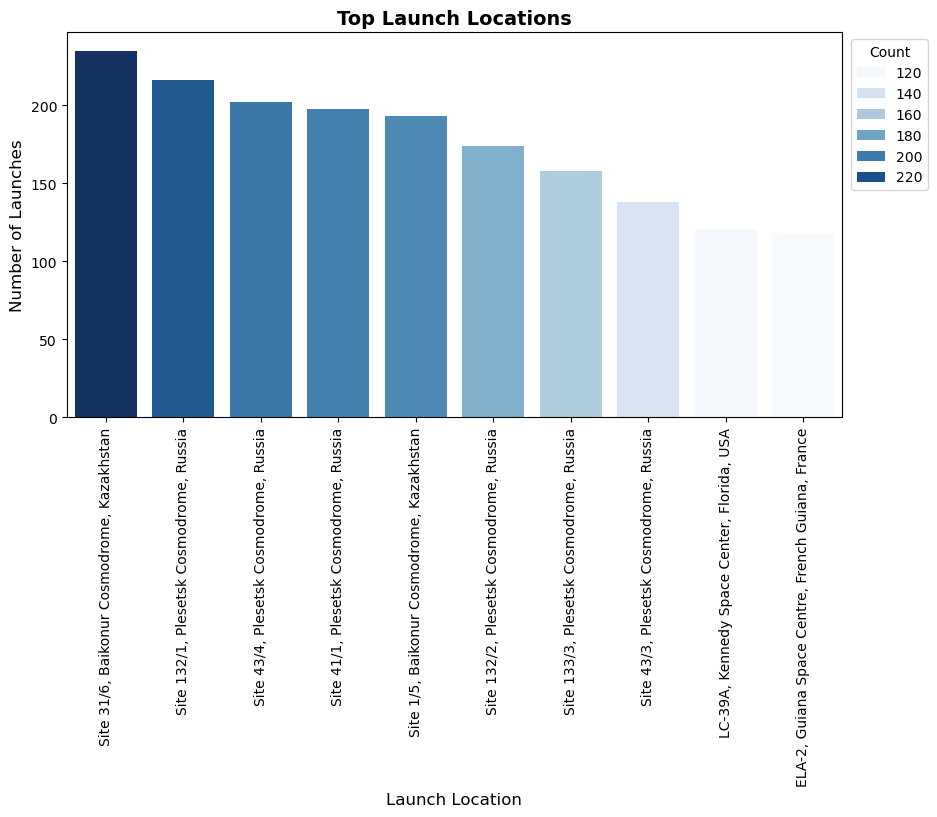

In [31]:
plt.figure(figsize=(10,5))
sb.barplot(x=R.index, y=R.values, hue=R,palette='Blues') 
plt.xlabel('Launch Location', fontsize=12)
plt.ylabel('Number of Launches', fontsize=12)
plt.title('Top Launch Locations', fontsize=14, fontweight='bold')
plt.legend(title='Count',bbox_to_anchor=(1.12,1.0))
plt.xticks(rotation=90)
plt.show()

#### Site 31/6, Baikonur Cosmodrome, Kazakhstan is the top location used for launch .It is used for 235 times.US nad France sites appear but with fewer launches compared to Russian locations.

### Which launch sites have higher success rates?

In [32]:
df[df['StatusMission'] == 'Success'].groupby('Location').size().reset_index(name='Count').sort_values(by='Count',ascending=False)

,Location,Count
98,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",220
84,"Site 132/1, Plesetsk Cosmodrome, Russia",203
106,"Site 43/4, Plesetsk Cosmodrome, Russia",190
103,"Site 41/1, Plesetsk Cosmodrome, Russia",186
85,"Site 132/2, Plesetsk Cosmodrome, Russia",164
...,...,...
77,"Santa Rita 2, San Marco Launch Platform, Kenya",1
108,"Site 45/2, Baikonur Cosmodrome, Kazakhstan",1
97,"Site 250, Baikonur Cosmodrome, Kazakhstan",1
124,"Tai Rui Barge, Yellow Sea",1


#### Site 31/6, Baikonur Cosmodrome, Kazakhstan have higher success rates.

# 5.Rocket Usage and Status:

### Which rockets are used most frequently?

In [33]:
r=df['Rocket'].value_counts().nlargest(10)

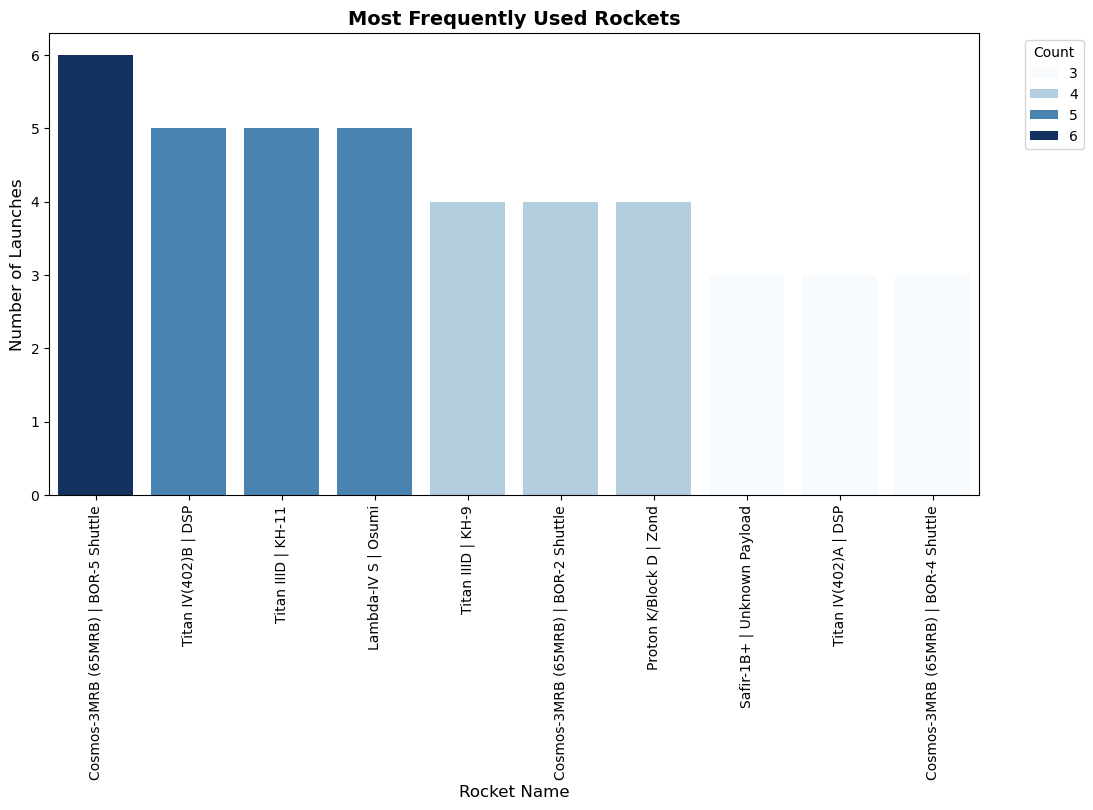

In [34]:
plt.figure(figsize=(12,6))
sb.barplot(x=r.index, y=r.values,hue=r ,palette='Blues')  
plt.xlabel('Rocket Name', fontsize=12)
plt.ylabel('Number of Launches', fontsize=12)
plt.title('Most Frequently Used Rockets', fontsize=14, fontweight='bold')
plt.legend(title='Count',bbox_to_anchor=(1.12,1.0))
plt.xticks(rotation=90)
plt.show()

#### A few rocket models like Kosmos-3MRB,Titan IV,and Titan IIID were used multiple times.Most rockets appear only a few times.

### How many rockets are still active vs. retired?

In [35]:
r=df['StatusRocket'].value_counts()

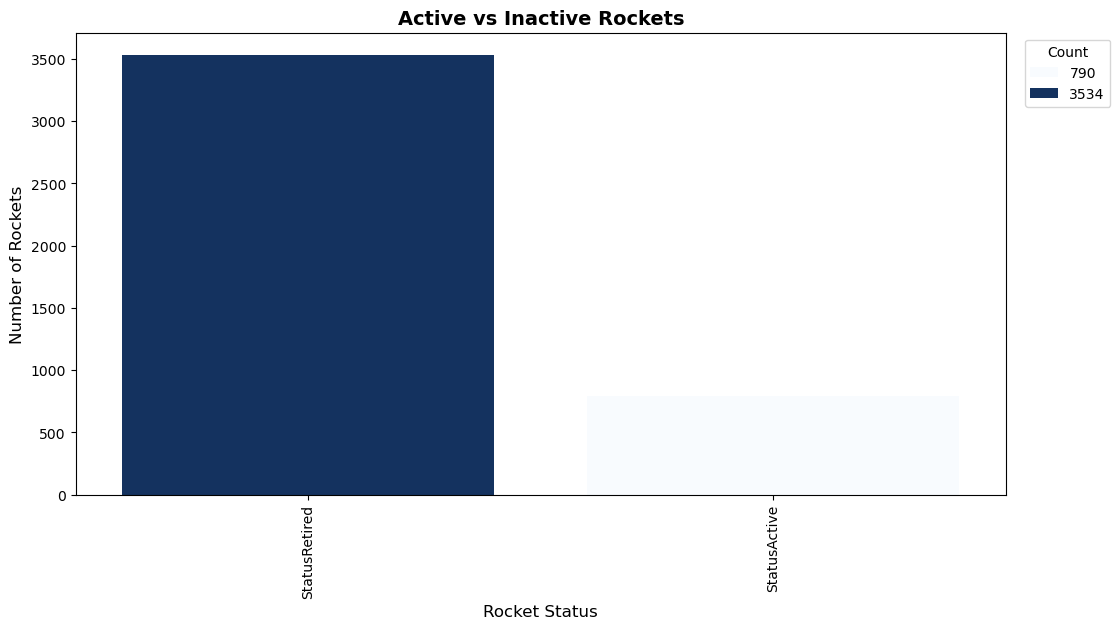

In [36]:
plt.figure(figsize=(12,6))
sb.barplot(x=r.index, y=r.values,hue=r ,palette='Blues')  
plt.xlabel('Rocket Status', fontsize=12)
plt.ylabel('Number of Rockets', fontsize=12)
plt.title('Active vs Inactive Rockets', fontsize=14, fontweight='bold')
plt.legend(title='Count',bbox_to_anchor=(1.12,1.0))
plt.xticks(rotation=90)
plt.show()

#### Majority of rockets are retired ,showing that older models are no longer in use.Only a small number remain active today. 

# 6.Cost Analysis:

### Which companies spend the most?

In [37]:
c= df.groupby("CompanyName")["Price"].mean().nlargest(10)

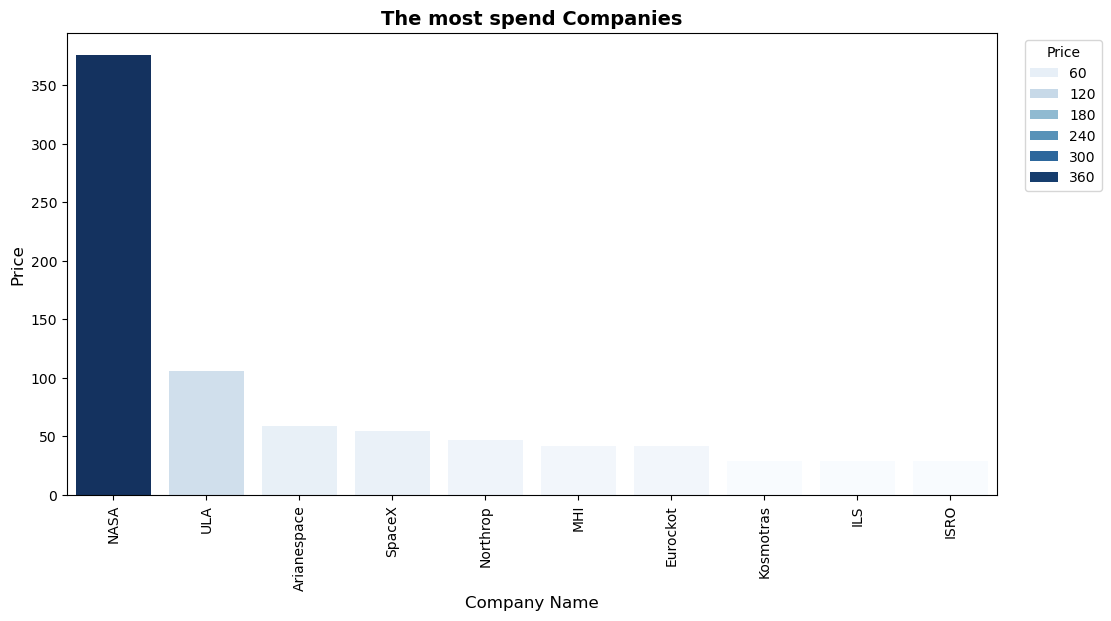

In [38]:
plt.figure(figsize=(12,6))
sb.barplot(x=c.index, y=c.values,hue=c,palette='Blues')  
plt.xlabel('Company Name', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('The most spend Companies', fontsize=14, fontweight='bold')
plt.legend(title='Price',bbox_to_anchor=(1.12,1.0))
plt.xticks(rotation=90)
plt.show()

#### NASA spends the most on misssions,far exceeding all others.ULA,Arianespace,SpaceX,and Northrop show moderate spending levels in comparison.

### Which missions or rockets are the most expensive?

In [48]:
s=df.groupby("Rocket")["Price"].sum().nlargest(10)

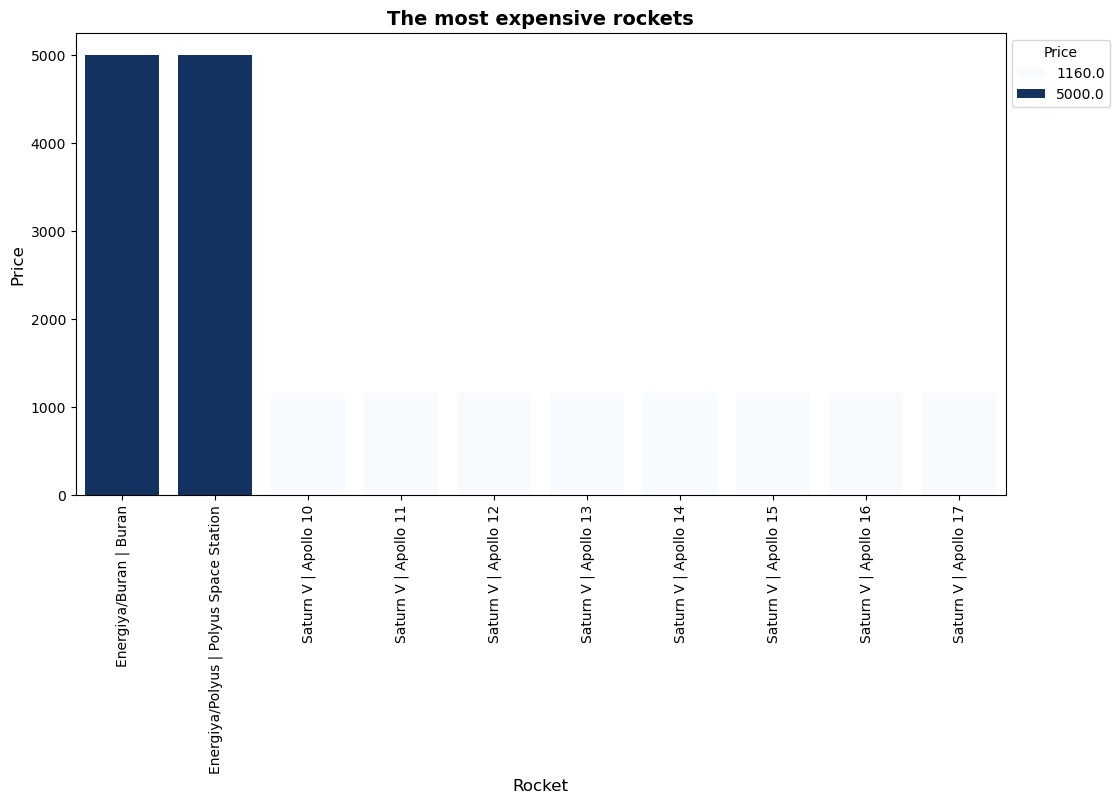

In [49]:
plt.figure(figsize=(12,6))
sb.barplot(x=s.index, y=s.values,hue=s,palette='Blues')  
plt.xlabel('Rocket', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('The most expensive rockets', fontsize=14, fontweight='bold')
plt.legend(title='Price',bbox_to_anchor=(1.12,1.0))
plt.xticks(rotation=90)
plt.show()

#### Energiya/Buran and Energiya/Polyus are the costlier rockets in the dataset.Saturn V missions also appear among the expensive launches but still far below Energiya.

# 7.Temporal Trends:


###  How has the number of space launches changed over the Years?


In [41]:
c=df['Year'].value_counts().sort_index()


C:\Users\DELL\AppData\Local\Temp\ipykernel_44116\2587882270.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(x=c.index, y=c.values, palette='Blues')


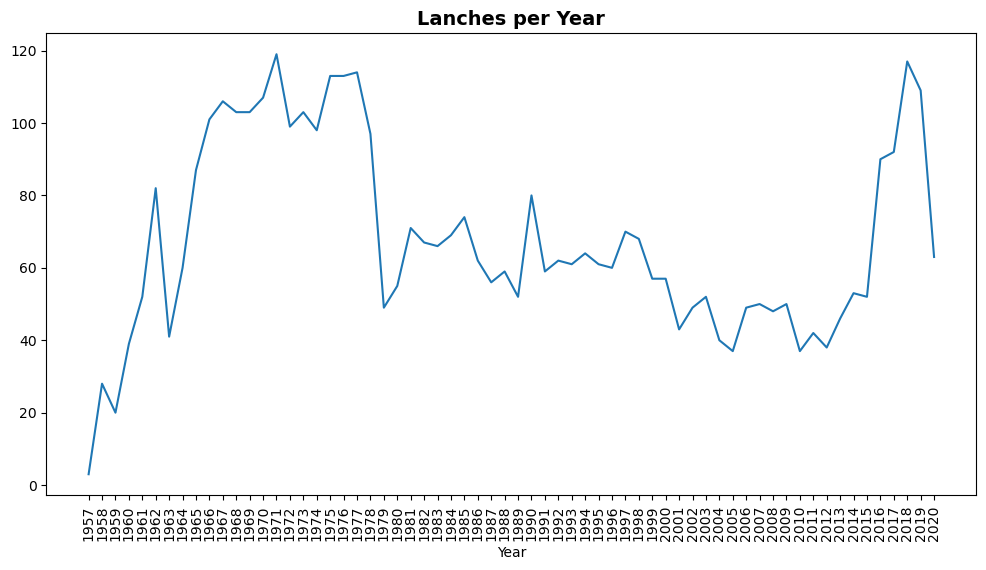

In [42]:
plt.figure(figsize=(12,6))
plt.title('Lanches per Year', fontsize=14, fontweight='bold')
sb.lineplot(x=c.index, y=c.values, palette='Blues')
plt.xticks(rotation=90)
plt.show()

 #### Launches peaked during the 1960s-1980s which is space race era.There is a dip in the 1990s-2000s and a rise again after 2010.

 ### Are there any noticeable trends in mission outcomes over the years?

In [50]:
r=df.groupby(['Year','StatusMission']).size().reset_index()

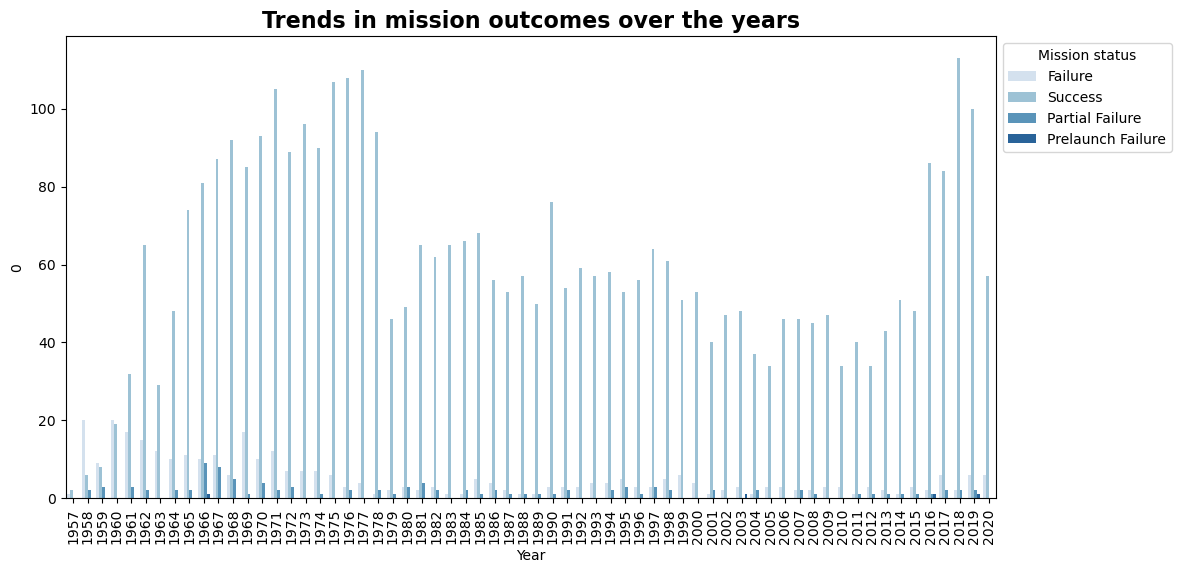

In [51]:
plt.figure(figsize=(12,6))
sb.barplot(x=r.Year,y=r[0],hue=r.StatusMission,palette='Blues')
plt.xticks(rotation=90)
plt.title('Trends in mission outcomes over the years',fontsize=16, fontweight='bold')
plt.legend(title='Mission status',bbox_to_anchor=(1.0,1.0))
plt.show()

#### Misssion success consistently increase over the decades.Failure become less frequent,showing improved technology and reliability.